In [71]:
import pandas as pd

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# import make classification
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [73]:
print(X.shape)

(10000, 2)


In [74]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def confusion_matrix_plot(pred, test):
    # plot confusion matrix
    cm = confusion_matrix(test, pred)

    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='g')

    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['Negative', 'Positive'])
    ax.yaxis.set_ticklabels(['Negative', 'Positive'])

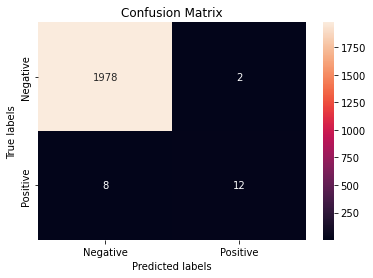

In [75]:
#ada boost
from sklearn.metrics import recall_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
AdaModel = AdaBoostClassifier(n_estimators=200, learning_rate = 1)
ada = AdaModel.fit(train_X, train_y)
confusion_matrix_plot(ada.predict(test_X), test_y)

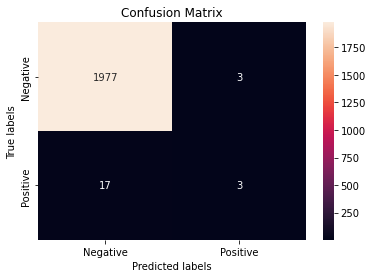

In [76]:
#logistic regression using adaboost
from sklearn.linear_model import  LogisticRegression

mylogregmodel = LogisticRegression()
ada_logreg = AdaBoostClassifier(n_estimators=50, base_estimator = mylogregmodel, learning_rate = 1)
ada_logreg.fit(train_X, train_y)
confusion_matrix_plot(ada_logreg.predict(test_X), test_y)

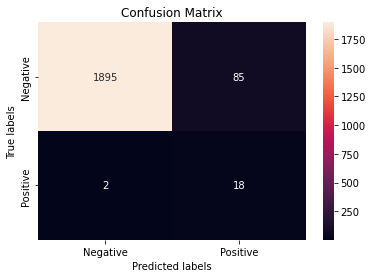

In [77]:
#Underbagging
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedBaggingClassifier
ub = BalancedBaggingClassifier(sampler=RandomUnderSampler())
ub.fit(train_X, train_y)
confusion_matrix_plot(ub.predict(test_X), test_y)

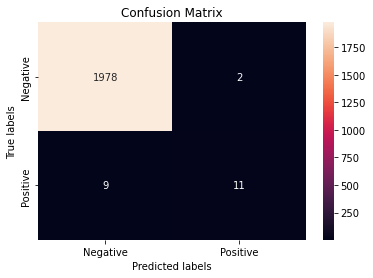

In [78]:
#Overbagging
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.over_sampling import RandomOverSampler
ob = BalancedBaggingClassifier(sampler=RandomOverSampler())
ob.fit(train_X, train_y)
confusion_matrix_plot(ob.predict(test_X), test_y)

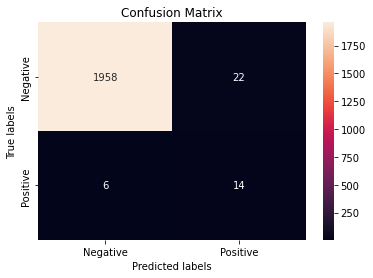

In [79]:
#SMOTEBagging
from imblearn.over_sampling import SMOTE
smote_bagging = BalancedBaggingClassifier(sampler=SMOTE())
smote_bagging.fit(train_X,train_y)
confusion_matrix_plot(smote_bagging.predict(test_X), test_y)

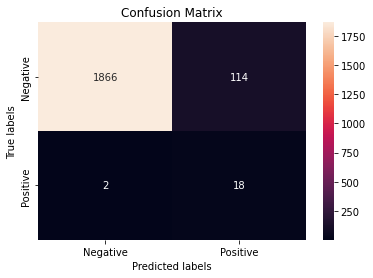

In [80]:
# SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
train_smote_X, train_smote_y = sm.fit_resample(train_X, train_y)
AdaModel = AdaBoostClassifier(n_estimators=100, learning_rate = 1)
smote = AdaModel.fit(train_smote_X, train_smote_y)
confusion_matrix_plot(smote.predict(test_X), test_y)

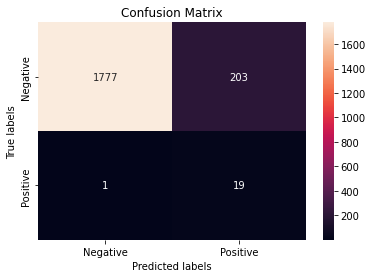

In [81]:
#RUS
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import resample
full_X = pd.DataFrame(train_X.copy())
full_X['target'] = train_y
maj_X = full_X[full_X.target==0]
min_X = full_X[full_X.target==1]
maj_rus_X = resample(maj_X,replace=False,n_samples=len(min_X),random_state=44)
rus_X = pd.concat([maj_rus_X, min_X])
train_rus_X = rus_X.drop(['target'], axis=1)
train_rus_y = rus_X.target
AdaModel = AdaBoostClassifier(n_estimators=100, learning_rate = 1)
rus = AdaModel.fit(train_rus_X, train_rus_y)
confusion_matrix_plot(rus.predict(test_X), test_y)

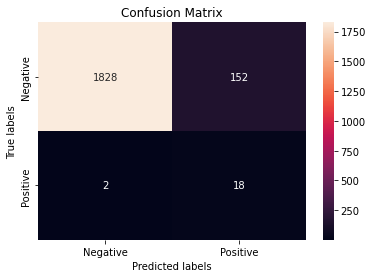

In [82]:
#EasyEnsemble Classifier
from imblearn.ensemble import EasyEnsembleClassifier
eec = EasyEnsembleClassifier(random_state=42 )
eec.fit(train_X, train_y)
confusion_matrix_plot(eec.predict(test_X), test_y)

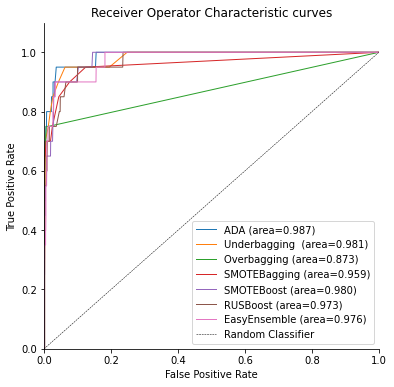

In [84]:
#ROC CURVE
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(6,6))

roc_auc_plot(test_y,ada.predict_proba(test_X),label='ADA',l='-')
roc_auc_plot(test_y,ub.predict_proba(test_X),label='Underbagging ',l='-')
roc_auc_plot(test_y,ob.predict_proba(test_X),label='Overbagging', l='-')
roc_auc_plot(test_y,smote_bagging.predict_proba(test_X),label='SMOTEBagging',l='-')
roc_auc_plot(test_y,smote.predict_proba(test_X),label='SMOTEBoost',l='-')
roc_auc_plot(test_y,rus.predict_proba(test_X),label='RUSBoost',l='-')
roc_auc_plot(test_y,eec.predict_proba(test_X),label='EasyEnsemble', l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        label='Random Classifier')    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1.1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()

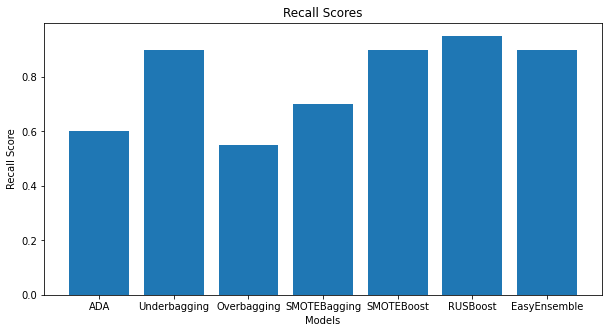

In [85]:
# import recall
from sklearn.metrics import recall_score
recalls = []

recalls.append(recall_score(test_y, ada.predict(test_X)))
recalls.append(recall_score(test_y, ub.predict(test_X)))
recalls.append(recall_score(test_y, ob.predict(test_X)))
recalls.append(recall_score(test_y, smote_bagging.predict(test_X)))
recalls.append(recall_score(test_y, smote.predict(test_X)))
recalls.append(recall_score(test_y, rus.predict(test_X)))
recalls.append(recall_score(test_y, eec.predict(test_X)))

# plot bar graph

plt.figure(figsize=(10,5))
plt.bar(['ADA','Underbagging','Overbagging','SMOTEBagging','SMOTEBoost','RUSBoost','EasyEnsemble'], recalls)
plt.title('Recall Scores')
plt.xlabel('Models')
plt.ylabel('Recall Score')
plt.show()

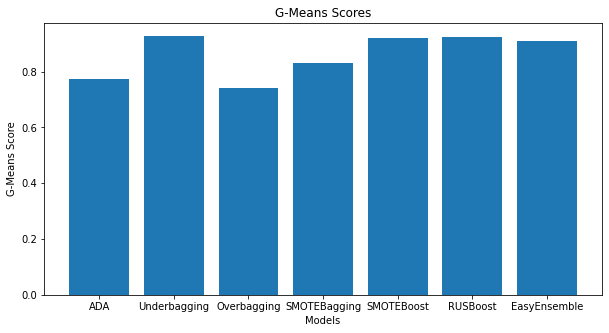

In [87]:
from helper import get_classification_scores

# get classification scores
r, p, f1, a, s, g, auc = get_classification_scores(ada, test_X, test_y)
r1, p1, f11, a1, s1, g1, auc1 = get_classification_scores(ub, test_X, test_y)
r2, p2, f12, a2, s2, g2, auc2 = get_classification_scores(ob, test_X, test_y)
r3, p3, f13, a3, s3, g3, auc3 = get_classification_scores(smote_bagging, test_X, test_y)
r4, p4, f14, a4, s4, g4, auc4 = get_classification_scores(smote, test_X, test_y)
r5, p5, f15, a5, s5, g5, auc5 = get_classification_scores(rus, test_X, test_y)
r6, p6, f16, a6, s6, g6, auc6 = get_classification_scores(eec, test_X, test_y)

# plot bar graph
plt.figure(figsize=(10,5))
plt.bar(['ADA','Underbagging','Overbagging','SMOTEBagging','SMOTEBoost','RUSBoost','EasyEnsemble'], [g,g1,g2,g3,g4,g5,g6])
plt.title('G-Means Scores')
plt.xlabel('Models')
plt.ylabel('G-Means Score')
plt.show()